In [1]:
# Imports:
from agents.Agent import Agent
from BMTemplate import Template
from rewards.BMRewardFunction import RewardFunction

from agents.DistributionAgent import DistributionAgent
from agents.HeuristicAvoidAgent import HeuristicAvoidAgent
from agents.HeuristicPushAgent import HeuristicPushAgent

from rewards.NewHeightReward import NewHeightReward
from templates.Templates import REGISTRY as tempReg

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
""" Compute the average rewards per step for a linear space of variants of a template """
def computeAverageRewards(  agent: Agent, template: Template, 
                            rewardfn: RewardFunction, VARIANTS: int = 40, 
                            ATTEMPTS: int = 3, ITERS: int = 800) -> list[float]:

    avrewards = []

    total = ITERS * ATTEMPTS * VARIANTS
    current = 0
    for i in range(0, VARIANTS):
        stepsTaken = 0
        avreward = 0.0

        # print("Variant: " + str(i) + ". Progress: " + str(current / total))
        for j in range(ATTEMPTS):
            state = template.create_world(variant = float(i / VARIANTS))
            for k in range(0, ITERS):
                # take action and simulate:
                state.apply_action(agent.take_action(state))
                # get reward:
                reward = rewardfn.compute(state)
                avreward += reward             
                stepsTaken += 1        
                if (reward < -50) or (reward > 50):
                    break

        avreward /= stepsTaken
        avrewards.append(avreward)

    return avrewards


In [3]:
def getTemplateRewardDict(  agent: Agent,
                            rewardfn: RewardFunction, VARIANTS: int = 40, 
                            ATTEMPTS: int = 3, ITERS: int = 800) -> dict[str, list[float]]:
    
    templateRewards: dict[str, list[float]] = {}

    for templateName in tempReg:
        print("Template: " + templateName)
        template = tempReg[templateName]
        avrewards = computeAverageRewards(  agent, template, 
                                            rewardfn, VARIANTS=VARIANTS, 
                                            ATTEMPTS=ATTEMPTS, ITERS=ITERS  )
        templateRewards[templateName] = avrewards       
        
    return templateRewards

In [4]:
distAgent1 = DistributionAgent([0.3, 0.4, 0.3, 0.1, 0, 0.1, 0, 0, 0])
distAgent2 = DistributionAgent([0.4, 0.1, 0.1, 0.2, 0, 0.0, 0, 0, 0])
distAgent3 = DistributionAgent([0.1, 0.1, 0.4, 0.0, 0, 0.2, 0, 0, 0])


VARIANTS = 40 # How many different variants to try
ATTEMPTS = 3   # How many attempts to allow per variant
ITERS = 1000   # Maximum iterations to allowed per attempt

rewardfn = NewHeightReward()

tempReg = {n: tempReg[n] for n in ('heavyobstacle', 'pinball')}

agent1Eval = getTemplateRewardDict( distAgent1, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )
agent2Eval = getTemplateRewardDict( distAgent2, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )
agent3Eval = getTemplateRewardDict( distAgent3, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )

Template: heavyobstacle
Template: pinball
Template: heavyobstacle
Template: pinball
Template: heavyobstacle
Template: pinball


In [5]:
ATTEMPTS = 1

avoidAgent = HeuristicAvoidAgent()
avoidAgentEval = getTemplateRewardDict( avoidAgent, rewardfn=rewardfn, 
                                        VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                        ITERS=ITERS )

pushAgent = HeuristicPushAgent()
pushAgentEval = getTemplateRewardDict(  pushAgent, rewardfn=rewardfn,
                                        VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                        ITERS=ITERS )

Template: heavyobstacle
Template: pinball
Template: heavyobstacle
Template: pinball


In [6]:
print(tempReg.keys())

dict_keys(['heavyobstacle', 'pinball'])


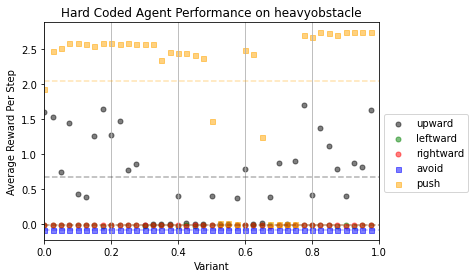

In [10]:
# Plot:
templateName = 'heavyobstacle'

plt.figure(figsize=(6, 4))

X = [float(x / VARIANTS) for x in range(0, VARIANTS)]

markerSize=25

plt.scatter(x=X, y=agent1Eval[templateName], c='black', alpha=0.5, s=markerSize, marker='o')
plt.scatter(x=X, y=agent2Eval[templateName], c='g', alpha=0.5, s=markerSize, marker='o')
plt.scatter(x=X, y=agent3Eval[templateName], c='r', alpha=0.5, s=markerSize, marker='o')
plt.scatter(x=X, y=avoidAgentEval[templateName], c='b', alpha=0.5, s=markerSize, marker='s')
plt.scatter(x=X, y=pushAgentEval[templateName], c='orange', alpha=0.5, s=markerSize, marker='s')

av1 = np.average(agent1Eval[templateName])
av2 = np.average(agent2Eval[templateName])
av3 = np.average(agent3Eval[templateName])
avAvoid = np.average(avoidAgentEval[templateName])
avPush = np.average(pushAgentEval[templateName])

plt.plot([0, 1], [av1, av1], c='black', alpha=0.3, linestyle='--')
plt.plot([0, 1], [av2, av2], c='g', alpha=0.3, linestyle='--')
plt.plot([0, 1], [av3, av3], c='r', alpha=0.3, linestyle='--')
plt.plot([0, 1], [avAvoid, avAvoid], c='b', alpha=0.3, linestyle='--')
plt.plot([0, 1], [avPush, avPush], c='orange', alpha=0.3, linestyle='--')


"""
err1 = np.std(agent1Eval[templateName])
err2 = np.std(agent2Eval[templateName])
err3 = np.std(agent3Eval[templateName])
err4 = np.std(avoidAgentEval[templateName])

plt.errorbar(X, agent1Eval[templateName], yerr=err1, c='black', marker='o', linestyle='')
plt.errorbar(X, agent2Eval[templateName], yerr=err2, c='g', marker='o', linestyle='')
plt.errorbar(X, agent3Eval[templateName], yerr=err3, c='r', marker='o', linestyle='')
plt.errorbar(X, avoidAgentEval[templateName], yerr=err4, c='b', marker='o', linestyle='')
"""

# plt.plot([0.0, 1.0], [0.0, 0.0], c='black', linestyle=':')
# a1poly = np.poly1d(np.polyfit(x=X, y=agent1Eval[templateName], deg=5))
# a2poly = np.poly1d(np.polyfit(x=X, y=agent2Eval[templateName], deg=5))
# a3poly = np.poly1d(np.polyfit(x=X, y=agent3Eval[templateName], deg=5))
# a4poly = np.poly1d(np.polyfit(x=X, y=avoidAgentEval[templateName], deg=5))

"""
plt.plot(X, a1poly(X), c='black')
plt.plot(X, a2poly(X), c='g')
plt.plot(X, a3poly(X), c='r')
# plt.plot(X, a4poly(X), c='b')
"""

plt.title('Hard Coded Agent Performance on ' + templateName)
plt.xlabel('Variant')
plt.ylabel('Average Reward Per Step')
plt.xlim((0, 1))
plt.grid(axis='x')
plt.legend(['upward', 'leftward', 'rightward', 'avoid', 'push'], bbox_to_anchor=(1.0, 0.6))


plt.show()

In [9]:
import pandas as pd

df = pd.DataFrame(columns=['upward', 'leftward', 'rightward', 'avoid', 'push'])
df['upward'] = agent1Eval[templateName]
df['leftward'] = agent1Eval[templateName]
df['rightward'] = agent1Eval[templateName]
df['avoid'] = agent1Eval[templateName]
df['push'] = agent1Eval[templateName]

df.to_csv('../experiment_data/' + templateName + '.csv', sep=',')